In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
%matplotlib inline
df = pd.read_csv("data.csv",index_col = 0)

In [95]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [96]:
print(df.duplicated().sum())
print(df.isnull().sum())

0
ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 88, dtype: int64


In [97]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [98]:
df = df[['ID', 'Name', 'Age','Nationality','Overall',
       'Potential', 'Club','Value', 'Wage',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Joined',
       'Height', 'Weight','Release Clause']]
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Joined', 'Height', 'Weight', 'Release Clause'],
      dtype='object')

# Questions to answer 
 1- relation between wage and ['overall',Nationality,,Age,posistion]
 2- sum wage for each team
 3- average age for each team

# 1- Relation between wage and Position

In [99]:
df['Wage']=df['Wage'].apply(lambda x : x.lstrip("€").rstrip("K"))
df['Wage']=df['Wage'].astype('int')
df['Wage'].dtype

dtype('int32')

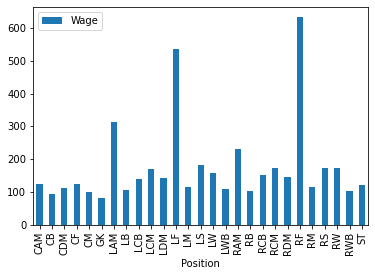

In [100]:
#average annual wage for each position
pos_wage = pd.DataFrame(df.groupby('Position')['Wage'].mean()*12)
pos_wage.plot(kind='bar');

# Question 2 : is there a postive correlation between international reputation and value

In [101]:
df[['International Reputation']].describe()

,International Reputation
count,18159.000000
mean,1.113222
std,0.394031
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,5.000000


In [102]:
df['Value']=df['Value'].apply(lambda x : x.lstrip("€").rstrip("K").rstrip("M"))
df['Value']=df['Value'].astype('float')
df['Value'].dtype

dtype('float64')

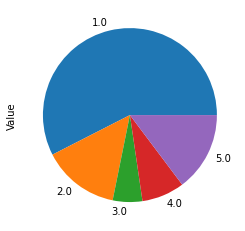

In [103]:
df.groupby('International Reputation')['Value'].mean().plot(kind='pie');

seems weird that players with low international reputation has higher mean values 

# Question 3 : we will invistigate the relation between wage and international reputation 

<AxesSubplot:xlabel='International Reputation'>

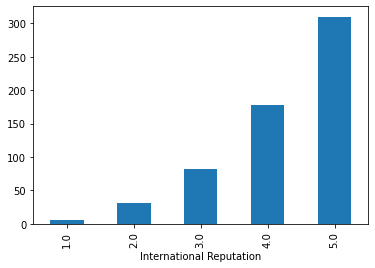

In [104]:
df.groupby('International Reputation')['Wage'].mean().plot(kind='bar')

players with high international reputation seems to have a larger mean wage 

<AxesSubplot:>

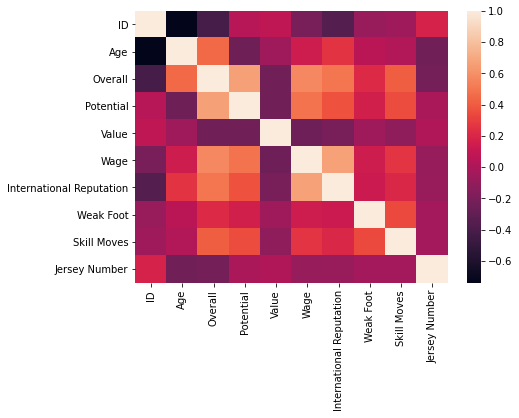

In [114]:
#df1 = df[['ID','Name','Nationality','Overall','Potential', 'Club','Value', 'Wage']]
plt.figure(figsize=(7,5))
sns.heatmap(df.corr())


# Question 4 : which Jersey number has the highest mean player value

In [120]:
print(df['Jersey Number'].dtype)
df.dropna(subset=['Jersey Number'],inplace=True)
df['Jersey Number']=df['Jersey Number'].astype('int')
print(df['Jersey Number'].dtype)

float64
int32


In [138]:
df.groupby('Jersey Number')['Value'].mean().sort_values(ascending=False)

Jersey Number
64    587.500000
52    466.110000
89    440.693333
78    440.380000
61    412.742857
         ...    
87    154.757143
71    146.590000
95     85.400000
79     83.250000
76     28.150000
Name: Value, Length: 99, dtype: float64

# Question 4 :Which club has the highest total player values

<AxesSubplot:ylabel='Club'>

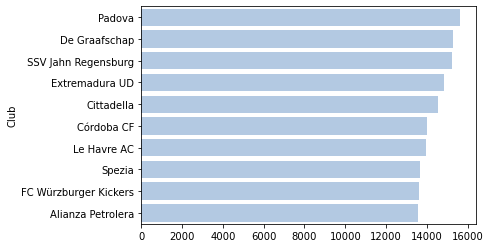

In [170]:
club_val = df.groupby('Club')['Value'].sum().sort_values(ascending=False)[0:10]
sns.barplot(y=club_val.index,x=club_val.values,color= '#abc9ea')